# Railroad Accident/Incident Analysis in US



#### Data Source:
Rail Equipment Accident/Incident Data from FRA in the US Department of Transportation <br/>
https://data.transportation.gov/Railroads/Rail-Equipment-Accident-Incident-Data/85tf-25kj

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Data Scope
1. Year recorded<br/>
2. what type of trains considered<br/>
3. what type of accident recorded<br/>

In [18]:
data = pd.read_csv("../../Test Data/Rail_Equipment_Accident_Incident_Data.csv")
print(f"There are {data.shape[0]} records availabe and {data.shape[1]} information recorded")
print("-------------------------------------------------------")
# available information is listed and explained in the above link
year_since = data["Report Year"].min()
year_to = data["Report Year"].max()
print(f"The datasets record year from {year_since} to {year_to}")
print("-------------------------------------------------------")
print(data["Accident Type"].unique())
print("-------------------------------------------------------")
print(data["Equipment Type"].unique())
print("-------------------------------------------------------")
print(data["Track Type"].unique())

There are 214157 records availabe and 159 information recorded
-------------------------------------------------------
The datasets record year from 1975.0 to 2022.0
-------------------------------------------------------
['Fire/violent rupture' 'Other impacts' 'Side collision' 'Derailment'
 'Broken train collision' 'Hwy-rail crossing'
 'Other (describe in narrative)' 'Rear end collision' 'Obstruction'
 'Head on collision' 'Explosion-detonation' 'Raking collision'
 'RR grade crossing' nan]
-------------------------------------------------------
['Passenger Train - Pulling' 'Single Car' 'Freight Train' 'Yard/switching'
 'Light loco(s)' 'Cut of cars' nan 'Passenger Train - Pushing'
 'Maint./inspect Car' 'EMU' 'Work train' 'Spec. MoW Equip.'
 'Commuter Train - Pulling' 'Commuter Train - Pushing' 'DMU']
-------------------------------------------------------
['Main' 'Yard' 'Industry' nan 'Siding']


## 2. Train Accident Overview
Question to be addressed:<br/>
Whether there is any improvement on reducing train accidents no during recent years?

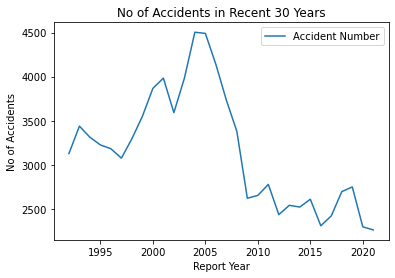

<Figure size 432x288 with 0 Axes>

In [30]:
# Investigate 30 years
overview_df = data.loc[(data["Report Year"] >= 1992.0) & (data["Report Year"]<=2021.0)]
group_year = overview_df.groupby("Report Year")
group_year[["Accident Number"]].count().plot(kind="line",title="No of Accidents in Recent 30 Years", ylabel="No of Accidents")
plt.show()
plt.savefig("Train Accident Overview.jpg")

## 3. Train Accident by Cause
Question to be addressed:<br/>
What is the major factor contributiong to accidents during recent years?<br/>

Additional data source: accident cause code<br/>
https://railroads.dot.gov/forms-guides-publications/guides/train-accident-cause-codes-file

In [116]:
data_cause = pd.read_csv("../../Test Data/Appendix C_Train_Accident_Cause_Codes.csv")[["Code","Title"]]
cause_ls = len(data_cause["Code"].unique())
record_ls = len(data["Primary Accident Cause Code"].unique())
print(f"There are {cause_ls} kinds of causes in total")
print("-------------------------------------------------------")
print(f"There are {record_ls} kinds of causes recorded")

There are 390 kinds of causes in total
-------------------------------------------------------
There are 390 kinds of causes recorded


In [129]:
# The above figures imply that each record in datasets could find a cause from the reference dataset
# however, when further investigating, the format of reference dataset is different from the records
# needs further cleaning
data_cause = data_cause.dropna()

new_code=[]
for i in range(len(data_cause.Code)):
    new = data_cause["Code"][i][:4]
    new_code.append(new)

data_cause["Primary Accident Cause Code"] = new_code
data2 = data[["Report Year","Accident Number","Primary Accident Cause Code"]]
data_cause_ana = pd.merge(data2,data_cause,how="left",on="Primary Accident Cause Code")
data_cause_ana.head()

,Report Year,Accident Number,Primary Accident Cause Code,Code,Title
0,2011.0,20110041,M406,M406,Miscellaneous Causes Not Otherwise Listed
1,2010.0,000074975,S016,S016,Signal and Communication
2,1998.0,059812027,E21C,E21C,Mechanical and Electrical Failures
3,1987.0,WA17,H702,H702,Train operation - Human Factors
4,2007.0,543854,T311,T311,"Rack, Roadbed and Structures"


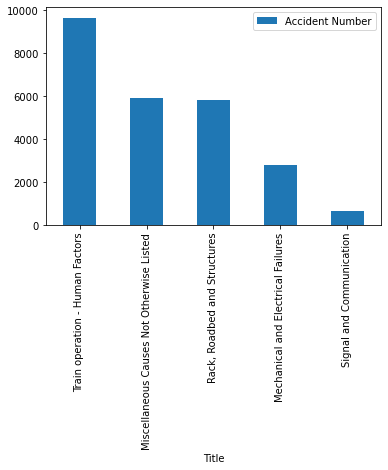

In [143]:
# 10 years are investigated
data_cause_ana = data_cause_ana.loc[(data_cause_ana["Report Year"]>=2012)&(data_cause_ana["Report Year"]<=2021)]
data_cause_plot = data_cause_ana.groupby("Title")[["Accident Number"]].count().sort_values(by="Accident Number",ascending=False)
data_cause_plot.plot.bar()
plt.show()

## 4. Train Accident by Type
Question to be addressed:<br/>
What is the primary accident types during recent years?

In [145]:
data["Accident Type"].unique()

array(['Fire/violent rupture', 'Other impacts', 'Side collision',
       'Derailment', 'Broken train collision', 'Hwy-rail crossing',
       'Other (describe in narrative)', 'Rear end collision',
       'Obstruction', 'Head on collision', 'Explosion-detonation',
       'Raking collision', 'RR grade crossing', nan], dtype=object)

There seems to be no standard for categorising types of accidents <br/>
so investigate one year data as an example and some common sense to determine the type

In [146]:
de = ["Derailment"]
ob = ["Obstruction"]
cr = ["Hwy-rail crossing","RR grade crossing"]
co = ["Side collision","Broken train collision","Rear end collision","Head on collision","Raking collision"]
oth = ["Fire/violent rupture","Explosion-detonation","Other (describe in narrative)","Other impacts"]

data3 = data[["Report Year","Accident Number","Accident Type"]]


In [147]:
type_list = []

for i in range(len(data3["Accident Type"])):
    acc_type = data3["Accident Type"][i]
    
    if acc_type in de:
        type_list.append("Derailment")
    elif acc_type in ob:
        type_list.append("Obstruction")
    elif acc_type in cr:
        type_list.append("Crossing")
    elif acc_type in co:
        type_list.append("Collision")
    elif acc_type in oth:
        type_list.append("Other Impacts")
    else:
        type_list.append("Not Available")

In [148]:
data3["Type_cat"] = type_list
data3.head()

C:\Users\Eva\anaconda3\envs\bootcamp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Report Year,Accident Number,Accident Type,Type_cat
0,2011.0,20110041,Fire/violent rupture,Other Impacts
1,2010.0,000074975,Other impacts,Other Impacts
2,1998.0,059812027,Other impacts,Other Impacts
3,1987.0,WA17,Side collision,Collision
4,2007.0,543854,Derailment,Derailment


In [150]:
data3.shape

(214157, 4)

## 5. Train Accident in States
Question to be addressed:<br/>
Which state has the most accident happended in recent years?

### 5.1 Fatality by state

#### Period" for last 11 years: 2010 - 2020

In [9]:
data_fatality = data[["State Name","Report Year","Total Persons Killed"]]
data_fatality = data_fatality.loc[(data_fatality["Report Year"] >= 2010.0) & (data_fatality["Report Year"]<=2020.0) ]
data_fatality.head()

,State Name,Report Year,Total Persons Killed
0,ALASKA,2011.0,0.0
1,ALABAMA,2010.0,0.0
5,ALABAMA,2010.0,0.0
6,ALABAMA,2010.0,0.0
8,ALABAMA,2013.0,0.0


In [14]:
state_group = data_fatality.groupby("State Name")
state_group["Total Persons Killed"].sum()

State Name
ALABAMA                 18.0
ALASKA                   0.0
ARIZONA                  8.0
ARKANSAS                11.0
CALIFORNIA              82.0
COLORADO                17.0
CONNECTICUT              0.0
DELAWARE                 0.0
DISTRICT OF COLUMBIA     0.0
FLORIDA                 70.0
GEORGIA                 12.0
IDAHO                    5.0
ILLINOIS                50.0
INDIANA                 21.0
IOWA                     8.0
KANSAS                   9.0
KENTUCKY                 5.0
LOUISIANA               21.0
MAINE                    2.0
MARYLAND                 7.0
MASSACHUSETTS            5.0
MICHIGAN                 8.0
MINNESOTA               12.0
MISSISSIPPI             24.0
MISSOURI                10.0
MONTANA                  9.0
NEBRASKA                 5.0
NEVADA                  12.0
NEW HAMPSHIRE            0.0
NEW JERSEY               7.0
NEW MEXICO               7.0
NEW YORK                23.0
NORTH CAROLINA          13.0
NORTH DAKOTA             8.0
OHI

## 6. Train Accident Associated Factors
Question to be addressed:<br/>
1. Whether there is relationship between train speed and people injured
2. Whether there is relationship between equipment weight and people injured